<h1><font size=12>
Deep Learning y Redes Neuronales</h1>
<h1>E07 - Convolutional Neural Network<br></h1>

Developed by [Jesus Solano](http://www.jesussolano.com/) <br> 
Version 8.3, 1 Julio 2018 


We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Normal option with full database
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # File is 160MB

In [4]:
# Only the first training batch and testing  # File is 58MB
import tarfile
from six.moves import cPickle

# Use local copy of the cifar-10 database
data_tar = tarfile.open('../datasets/cifar-10-python_trainingbatch1_test.tar.gz')

def extract_xy(member, data_tar):
    d = cPickle.load(data_tar.extractfile(member), encoding='bytes')
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    X = d['data']
    X = X.reshape(X.shape[0], 3, 32, 32)
    y = d['labels']
    return X.transpose(0, 2, 3, 1), np.reshape(y, (len(y), 1))

X_train, y_train = extract_xy('cifar-10-batches-py/data_batch_1', data_tar)
X_test, y_test = extract_xy('cifar-10-batches-py/test_batch', data_tar)

In [5]:
X_train.shape, X_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
nb_classes = y_train.max() + 1
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [7]:
labels = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
y_train[0]

array([6])

In [10]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

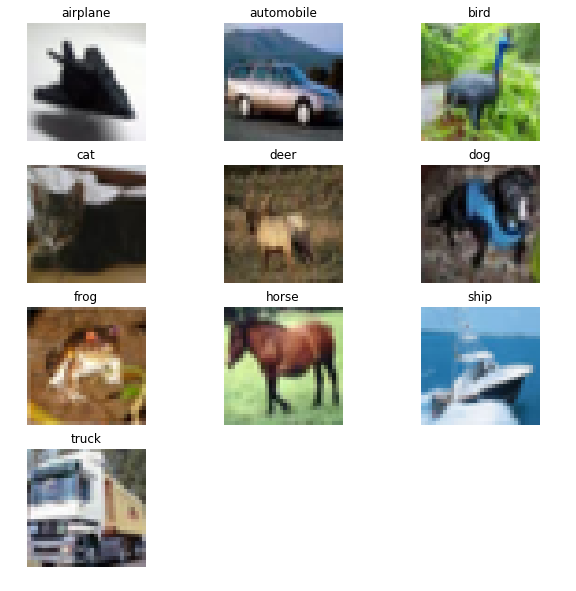

In [11]:
# Select one image per y
images = [np.nonzero(Y_train[:,i] == 1)[0][0] for i in range(nb_classes)]

# Plot all images
fig, ax = plt.subplots(4,3, figsize=(10,10))
ax = ax.reshape(12)
for i in range(nb_classes):
    ax[i].imshow(X_train[images[i]])
    ax[i].set_title(labels[y_train[images[i]][0]])
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
plt.show()

# Exercise 08.1

Train a Softmax regression using keras
Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 31% with 50 epochs)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras

In [17]:
from keras import backend as K
K.clear_session()

# Model structure.
outputClasses = 10

# Create the model. 
softmaxNN = Sequential()

# Convert from 32x32x3 to one vector. 
softmaxNN.add(Flatten(input_shape=(32,32,3)))

# Add the fully connected.
softmaxNN.add(Dense(outputClasses))

# Add the activation softmax.
softmaxNN.add(Activation('softmax'))

softmaxNN.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
flatten_1 (Flatten)            (None, 3072)                0          
______________________________________________________________________
dense_1 (Dense)                (None, 10)                  30730      
______________________________________________________________________
activation_1 (Activation)      (None, 10)                  0          
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
______________________________________________________________________


In [18]:
# Compile the model. 
softmaxNN.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

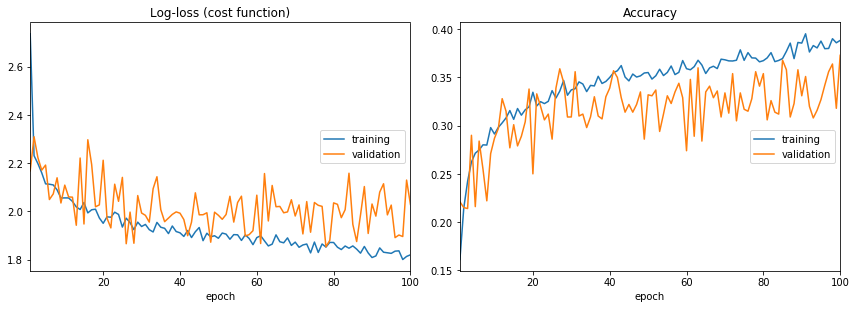

In [19]:
# Train neural network. 

softmaxNN.fit(X_train, Y_train, epochs=100, verbose=2,batch_size=500,validation_split=0.1,callbacks=[PlotLossesKeras()])

In [20]:
# Testing the perfomance. 

yPred= softmaxNN.predict_classes(X_test)
print(yPred)

[3 8 8 ... 3 4 7]


In [21]:
print('The accuracy over the test set is: ', (yPred==y_test[:,0]).mean())

The accuracy over the test set is:  0.338


# Exercise 08.2

Train a Deep Neural Network with the following architecture:

- Input = Image (32, 32, 3)
- Conv2d(32, (3,3), padding='same')
- Relu Activation
- MaxPooling2D (2,2)
- Dropout(0.5)
- Flattern
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [24]:
from keras import backend as K
K.clear_session()

# Model structure.
outputClasses = 10

# Create the model. 
cnn = Sequential()

# Apply a convolutional 2D. 

cnn.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))

# Add the activation softmax.
cnn.add(Activation('relu'))

# Apply maxpooling. 
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Add a dropout.
cnn.add(Dropout(0.5))

# Apply a convolutional layer. 
cnn.add(Flatten())

# Add the fully connected.
cnn.add(Dense(outputClasses))

# Add the activation softmax.
cnn.add(Activation('softmax'))

cnn.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
conv2d_1 (Conv2D)              (None, 32, 32, 32)          896        
______________________________________________________________________
activation_1 (Activation)      (None, 32, 32, 32)          0          
______________________________________________________________________
max_pooling2d_1 (MaxPooling2D) (None, 16, 16, 32)          0          
______________________________________________________________________
dropout_1 (Dropout)            (None, 16, 16, 32)          0          
______________________________________________________________________
flatten_1 (Flatten)            (None, 8192)                0          
______________________________________________________________________
dense_1 (Dense)                (None, 10)                  81930      
______________________________________________________________________
activa

In [25]:
# Compile the model. 
cnn.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

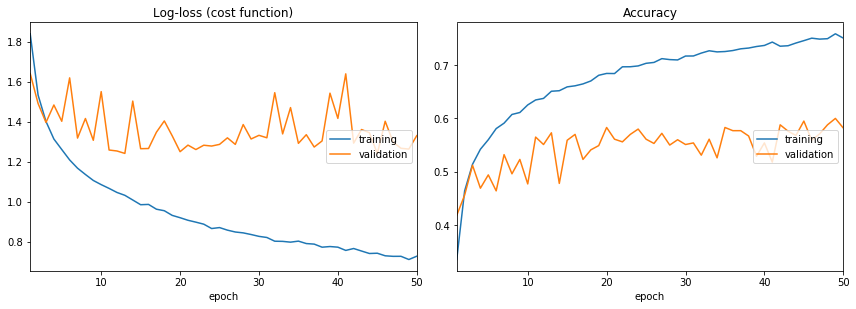

In [26]:
# Train neural network. 

cnn.fit(X_train, Y_train, epochs=50, verbose=2,validation_split=0.1,callbacks=[PlotLossesKeras()])

In [27]:
# Testing the perfomance. 

yPred= cnn.predict_classes(X_test)
print(yPred)

[3 8 8 ... 3 4 4]


In [28]:
print('The accuracy over the test set is: ', (yPred==y_test[:,0]).mean())

The accuracy over the test set is:  0.5676


# Exercise 08.3

Use the last layer of VGG16 as the input to a neural network with softmax output

- Input = Image (32, 32, 3)
- VGG16 
- Flattern
- Dense(512, Softmax)
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 57% with 50 epochs)

In [29]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [30]:
# Pre-process X.
newXtrain=model_vgg16.predict(X_train)

In [31]:
newXtrain.shape

(10000, 1, 1, 512)

In [32]:
# Model structure.
outputClasses = 10

# Create the model. 
cnn_transfer = Sequential()

# Apply a convolutional layer. 
cnn_transfer.add(Flatten(input_shape=(1,1,512)))

# Add the fully connected.
cnn_transfer.add(Dense(512, activation='relu'))

# Add a dropout.
cnn_transfer.add(Dropout(0.5))

# Add the fully connected.
cnn_transfer.add(Dense(512, activation='softmax'))

# Add the fully connected.
cnn_transfer.add(Dense(outputClasses))

# Add the activation softmax.
cnn_transfer.add(Activation('softmax'))

cnn_transfer.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
flatten_2 (Flatten)            (None, 512)                 0          
______________________________________________________________________
dense_2 (Dense)                (None, 512)                 262656     
______________________________________________________________________
dropout_2 (Dropout)            (None, 512)                 0          
______________________________________________________________________
dense_3 (Dense)                (None, 512)                 262656     
______________________________________________________________________
dense_4 (Dense)                (None, 10)                  5130       
______________________________________________________________________
activation_3 (Activation)      (None, 10)                  0          
Total params: 530,442
Trainable params: 530,442
Non-trainable params: 0
_____

In [33]:
# Compile the model. 
cnn_transfer.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

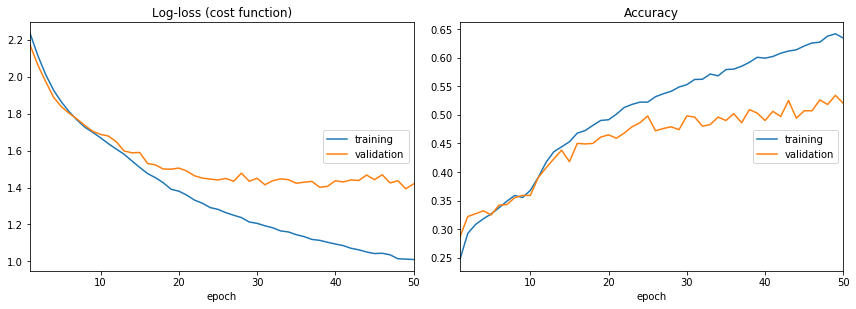

In [34]:
# Train neural network. 

cnn_transfer.fit(newXtrain, Y_train, epochs=50, verbose=2,validation_split=0.1,callbacks=[PlotLossesKeras()])

In [37]:
# Testing the perfomance. 
newXtest=model_vgg16.predict(X_test)

yPred= cnn_transfer.predict_classes(newXtest)
print('Examples of prediction classes are:\n',yPred)

Examples of prediction classes are:
 [5 8 8 ... 5 2 7]


In [36]:
print('The accuracy over the test set is: ', (yPred==y_test[:,0]).mean())

The accuracy over the test set is:  0.5059
